<a href="https://colab.research.google.com/github/jaeohshin/ML_with_Pytorch_Sklearn_rasbt/blob/main/ch14_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([
            zero_pad, x_padded, zero_pad
        ])
    res = []
    for i in range(0, int((len(x_padded)-len(w_rot)))+1, s):
        res.append(np.sum(
            x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)

In [3]:
x = [1, 3, 2, 4, 5, 6]
w = [1, 2, 3]
print(conv1d(x, w, p=0, s=1))

[11 17 19 28]


In [4]:
import scipy.signal

def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1, ::-1]
    X_org = np.array(X)
    n1 = X_org.shape[0] + 2*p[0]
    n2 = X_org.shape[1] + 2*p[1]

    ## make zero matrix with padded size.
    X_padded = np.zeros(shape=(n1, n2))

    ## replace the inner part of the matrix with the original matrix
    X_padded[p[0]:p[0]+X_org.shape[0], p[1]:p[1]+X_org.shape[1]] = X_org

    res = []
    for i in range(0, (X_padded.shape[0]-W_rot.shape[0])+1, 1):
        res.append([])
        for j in range(0, (X_padded.shape[1] - W_rot.shape[1])+1, 1):

            # Select the sub-field (matrix) for convolution calculation
            X_sub = X_padded[i:i + W_rot.shape[0], j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))

In [5]:
X = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

W = [
    [1, 0, 3],
    [1, 2, 1],
    [0, 1, 1]
]

print('Conv2d Implementation:\n', conv2d(X, W, p=(1, 1), s = (1, 1)))

Conv2d Implementation:
 [[ 9. 26. 23.]
 [22. 53. 46.]
 [26. 41. 37.]]


파이토치를 사용하여 심층 합성곱 신경망 구현

In [6]:
import torch
import torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root=image_path,
                                           train=True,
                                           transform=transform,
                                           download=True)

from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000, len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path,
                                                train=False,
                                                transform=transform,
                                                download=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4408621.39it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 64264.50it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1033706.81it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8362830.89it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [7]:
from torch.utils.data import DataLoader

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle=False)

In [8]:
import torch.nn as nn

Constructing a CNN in PyTorch

In [9]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 64, 7, 7])

In [10]:
model.add_module('flatten', nn.Flatten())
x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

In [11]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))

model.add_module('fc2', nn.Linear(1024, 10))

In [12]:
model

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [13]:
device = torch.device("cuda:0")
model = model.to(device)

In [14]:
model

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [16]:
from ast import Num
loss_fn = nn.CrossEntropyLoss() ##Softmax function is used here already.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):

        #train mode
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        #evaluation mode
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)
                pred = model(x_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()
        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 20
his = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9504 val_accuracy: 0.9810
Epoch 2 accuracy: 0.9842 val_accuracy: 0.9873
Epoch 3 accuracy: 0.9893 val_accuracy: 0.9865
Epoch 4 accuracy: 0.9921 val_accuracy: 0.9888
Epoch 5 accuracy: 0.9932 val_accuracy: 0.9897
Epoch 6 accuracy: 0.9950 val_accuracy: 0.9899
Epoch 7 accuracy: 0.9950 val_accuracy: 0.9896
Epoch 8 accuracy: 0.9966 val_accuracy: 0.9890
Epoch 9 accuracy: 0.9963 val_accuracy: 0.9918
Epoch 10 accuracy: 0.9968 val_accuracy: 0.9899
Epoch 11 accuracy: 0.9968 val_accuracy: 0.9904
Epoch 12 accuracy: 0.9976 val_accuracy: 0.9912
Epoch 13 accuracy: 0.9980 val_accuracy: 0.9876
Epoch 14 accuracy: 0.9972 val_accuracy: 0.9893
Epoch 15 accuracy: 0.9979 val_accuracy: 0.9903
Epoch 16 accuracy: 0.9980 val_accuracy: 0.9897
Epoch 17 accuracy: 0.9985 val_accuracy: 0.9906
Epoch 18 accuracy: 0.9976 val_accuracy: 0.9900
Epoch 19 accuracy: 0.9982 val_accuracy: 0.9891
Epoch 20 accuracy: 0.9984 val_accuracy: 0.9898


In [29]:
torch.cuda.synchronize()
model_cpu = model.cpu()
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 0.9895


Text(0, 0.5, 'Accuracy')

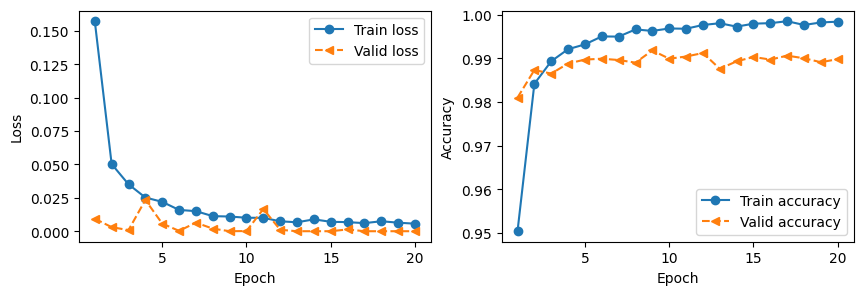

In [30]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(Numhis[0]))+1
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, Numhis[0], '-o', label='Train loss')
ax.plot(x_arr, Numhis[1], '--<', label='Valid loss')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, Numhis[2], '-o', label='Train accuracy')
ax.plot(x_arr, Numhis[3], '--<', label='Valid accuracy')
ax.set_xlabel('Epoch')
ax.legend()
ax.set_ylabel('Accuracy')




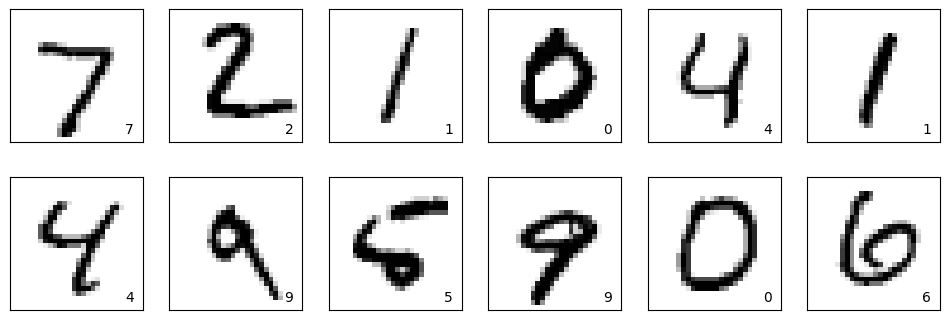

In [32]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = mnist_test_dataset[i][0][0, :, :]
    pred = model(img.unsqueeze(0).unsqueeze(1))
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, y_pred.item(),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

plt.show()